In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Import local modules
from src.analytic import analytic
from src.difference import difference
from src.neural import neural

## Finding analytical solutions and solutions by forward-difference method

In [3]:
t_end = 1
Nx_1 = 11
Nt_1 = 201

analytic_solution_1 = analytic(t_end, Nx_1, Nt_1)
difference_solution_1 = difference(t_end, Nx_1, Nt_1)

Nx_2 = 101
Nt_2 = 20001

analytic_solution_2 = analytic(t_end, Nx_2, Nt_2)
difference_solution_2 = difference(t_end, Nx_2, Nt_2)


## Evaluation of forward-difference solutions

In [4]:
# Maximal absolute differences
print('Maximal absolute difference between difference solution 1 and analytical solution 1: {}'.format(
    np.max(np.abs(difference_solution_1 - analytic_solution_1))))
print('Maximal absolute difference between difference solution 2 and analytical solution 2: {}'.format(
    np.max(np.abs(difference_solution_2 - analytic_solution_2))))

Maximal absolute difference between difference solution 1 and analytical solution 1: 0.006163504616922555
Maximal absolute difference between difference solution 2 and analytical solution 2: 6.052469419354223e-05


In [ ]:
## Finding solutions by using a neural network

In [8]:
tf.reset_default_graph()
neural_solution_1 = neural(t_end, Nx_1, Nt_1, num_hidden_neurons=[20, 20], learning_rate=0.01, num_iter=100000, tolerance=0.003)

Neural
[<tf.Tensor 'loss/gradients/AddN:0' shape=(2211, 1) dtype=float64>]
[<tf.Tensor 'loss/gradients_2/AddN_4:0' shape=(2211, 1) dtype=float64>]
Iteration 0. Loss: 11.444024085998535
Iteration 1000. Loss: 0.4537202715873718
Iteration 2000. Loss: 0.20002096891403198
Iteration 3000. Loss: 0.14370638132095337
Iteration 4000. Loss: 0.08566262573003769
Iteration 5000. Loss: 0.08780090510845184
Iteration 6000. Loss: 0.07508470118045807
Iteration 7000. Loss: 0.06084087863564491
Iteration 8000. Loss: 0.049800485372543335
Iteration 9000. Loss: 0.043145425617694855
Iteration 10000. Loss: 0.0376594103872776
Iteration 11000. Loss: 0.033119961619377136
Iteration 12000. Loss: 0.029337475076317787
Iteration 13000. Loss: 0.026168769225478172
Iteration 14000. Loss: 0.023501519113779068
Iteration 15000. Loss: 0.02124597318470478
Iteration 16000. Loss: 0.019329553470015526
Iteration 17000. Loss: 0.017693212255835533
Iteration 18000. Loss: 0.016288569197058678
Iteration 19000. Loss: 0.01507584098726511


In [7]:
tf.reset_default_graph()
neural_solution_1 = neural(t_end, Nx_2, Nt_2, num_hidden_neurons=[8], learning_rate=0.01, num_iter=100000, tolerance=0.003)

Neural
[<tf.Tensor 'loss/gradients/AddN:0' shape=(2020101, 1) dtype=float64>]
[<tf.Tensor 'loss/gradients_2/AddN_3:0' shape=(2020101, 1) dtype=float64>]
Iteration 0. Loss: 10.543259620666504


KeyboardInterrupt: 

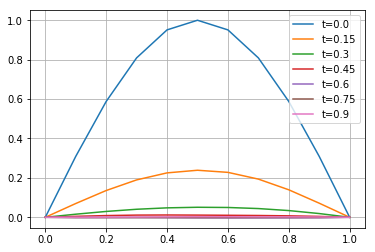

In [12]:
t_values = np.linspace(0, t_end, Nt)
x_values = np.linspace(0, 1, Nx)
for no, t_value in enumerate(t_values):
    if no % 30 == 0:
        values = neural_solution_1[no]
        plt.plot(x_values, values, label='t={}'.format(t_value))
plt.legend()
plt.grid(True)
plt.show()

## Evaluation of neural network solutions

In [9]:
# Maximal absolute differences
print('Maximal absolute difference between neural solution 1 and analytical solution 1: {}'.format(
    np.max(np.abs(neural_solution_1 - analytic_solution_1))))
# print('Maximal absolute difference between neural solution 2 and analytical solution 2: {}'.format(
    # np.max(np.abs(neural_solution_2 - analytic_solution_2))))

Maximal absolute difference between neural solution 1 and analytical solution 1: 0.008333383816292027
